<a href="https://colab.research.google.com/github/JJGladstone/jjgladstone.github.io/blob/main/Cog_Reappraisal_BBC_data_May_16_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [74]:
# Ensure statsmodels and matplotlib are installed
!pip install statsmodels matplotlib

# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot


# Access data

In [75]:
!wget -O bbcdata.dta "https://www.dropbox.com/scl/fi/9evppnf50i60bpy295cz9/bbc_big_money_test_deposited_version.dta?rlkey=ogtzhrwjqod8i9sll62so1uua&dl=1"

--2025-05-17 05:01:22--  https://www.dropbox.com/scl/fi/9evppnf50i60bpy295cz9/bbc_big_money_test_deposited_version.dta?rlkey=ogtzhrwjqod8i9sll62so1uua&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1b627b8d4898a1a7e6c029b290.dl.dropboxusercontent.com/cd/0/inline/Cp3Z0jMt84OaZ1f04gz9ibrBl3MKcXu-ulGCxRbibBHPxyeFYt-qwaS_MWilMGM-oKwSov_KAN-7xrlSKeJDGuQw19Q60bt3C5BU5tVo4wWBcWjU_7b3CK73gbpOdbKIIzMByYUwma0cG-f6X2xcdDry/file?dl=1# [following]
--2025-05-17 05:01:22--  https://uc1b627b8d4898a1a7e6c029b290.dl.dropboxusercontent.com/cd/0/inline/Cp3Z0jMt84OaZ1f04gz9ibrBl3MKcXu-ulGCxRbibBHPxyeFYt-qwaS_MWilMGM-oKwSov_KAN-7xrlSKeJDGuQw19Q60bt3C5BU5tVo4wWBcWjU_7b3CK73gbpOdbKIIzMByYUwma0cG-f6X2xcdDry/file?dl=1
Resolving uc1b627b8d4898a1a7e6c029b290.dl.dropboxusercontent.com (uc1b627b8d4898a1a7e6c029b290.dl.drop

In [76]:
# Load the dataset
df = pd.read_stata('bbcdata.dta')


# Prepare Variables

In [77]:

# --- DIAGNOSTIC STEP 1: Check q_cols immediately after loading ---
print("Unique values and their types in q_cols IMMEDIATELY AFTER LOADING:")
q_cols_to_check = ['q145', 'q146', 'q147', 'q148', 'q149', 'q150', 'q151']
for col in q_cols_to_check:
    print(f"\n--- {col} ---")
    print(f"Data type: {df[col].dtype}")
    print("Value counts:")
    # Using .value_counts(dropna=False) is crucial here
    print(df[col].value_counts(dropna=False).sort_index())
# --- END DIAGNOSTIC STEP 1 ---

# %% [markdown]
# # Prepare Variables
# %%
# egen count_bad_behav = rowtotal(q145-q151)

# Define the list of columns to sum
q_cols = ['q145', 'q146', 'q147', 'q148', 'q149', 'q150', 'q151']

# --- DIAGNOSTIC STEP 2: Check unique values and their types before mapping ---
# (Keep this from the previous attempt, it's still useful)
print("\n--- DIAGNOSTIC STEP 2: Unique values and their types in q_cols BEFORE mapping ---")
for col in q_cols:
    print(f"\n--- {col} ---")
    print(f"Data type: {df[col].dtype}")
    print("Value counts:")
    print(df[col].value_counts(dropna=False).sort_index())
# --- END DIAGNOSTIC STEP 2 ---

# Define the mapping from categories to numeric values
# Adjust this mapping based on the output of Diagnostic Step 1 or 2
# Example: if values are 0 and 1, the mapping would be {0: 0, 1: 1}
# If values are strings like ' No', ' Yes', adjust accordingly.
# Based on Stata output showing "Yes" and "No" labels, let's try mapping those.
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping and convert to numeric
for col in q_cols:
    # Use isinstance check for categorical dtype (to address DeprecationWarning)
    # The diagnostic step will tell us if it's actually categorical or already float
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        # Use .map() with the mapping dictionary
        # Use errors='coerce' to handle any other categories that might exist
        df[col] = df[col].map(mapping).astype(float)
    else:
        # If it's not categorical, but loaded as something else (like object or float)
        # and contains 'Yes'/'No' strings, try mapping directly before to_numeric
        # This handles the case where read_stata didn't make it categorical
        df[col] = df[col].map(mapping).astype(float) # Try mapping strings/objects
        # The previous version had pd.to_numeric here, but .map() already gives floats/NaNs
        # If the column *was* already numeric 0/1 and not category, this map would still work.


# Now sum the numeric columns across axis 1
# sum(axis=1) automatically skips NaN values
df['count_bad_behav'] = df[q_cols].sum(axis=1)

# Display some checks to verify after mapping
print("\n--- Checks AFTER mapping and conversion ---")
print("Data types of q_cols:")
print(df[q_cols].dtypes)

print("\nFirst 5 rows of the 'count_bad_behav' column:")
print(df['count_bad_behav'].head())

print("\nSummary statistics for 'count_bad_behav':")
print(df['count_bad_behav'].describe())

print("\nValue counts for q145 after mapping:")
print(df['q145'].value_counts(dropna=False).sort_index())

Unique values and their types in q_cols IMMEDIATELY AFTER LOADING:

--- q145 ---
Data type: category
Value counts:
q145
No     108042
Yes      1412
NaN        18
Name: count, dtype: int64

--- q146 ---
Data type: category
Value counts:
q146
No     108800
Yes       654
NaN        18
Name: count, dtype: int64

--- q147 ---
Data type: category
Value counts:
q147
No     108748
Yes       706
NaN        18
Name: count, dtype: int64

--- q148 ---
Data type: category
Value counts:
q148
No     109167
Yes       287
NaN        18
Name: count, dtype: int64

--- q149 ---
Data type: category
Value counts:
q149
No     100185
Yes      9269
NaN        18
Name: count, dtype: int64

--- q150 ---
Data type: category
Value counts:
q150
No     89052
Yes    20402
NaN       18
Name: count, dtype: int64

--- q151 ---
Data type: category
Value counts:
q151
No     88137
Yes    21317
NaN       18
Name: count, dtype: int64

--- DIAGNOSTIC STEP 2: Unique values and their types in q_cols BEFORE mapping ---

--- q145

In [78]:
# gen freq_check = q168
# replace freq_check = 0 if freq_check == 6
# replace freq_check = . if freq_check == 7
# Access the underlying numeric codes of the categorical variable q168
# .cat.codes returns an integer representation of the categories
df['freq_check'] = df['q168'].cat.codes

# .cat.codes assigns -1 to missing values, change these to np.nan
df.loc[df['freq_check'] == -1, 'freq_check'] = np.nan

# Convert the column to a numeric type (float) if it's not already
# Although .cat.codes is int, explicit conversion can be good practice
df['freq_check'] = df['freq_check'].astype(float)


df.loc[df['freq_check'] == 6, 'freq_check'] = 0
df.loc[df['freq_check'] == 7, 'freq_check'] = np.nan # This replacement assumes 7 was a valid code before converting to NaN

In [79]:
# Check if the replacement to np.nan is working as expected
df.loc[df['freq_check'] == -1, 'freq_check'] = np.nan
print("Number of NaNs in freq_check after replacement:", df['freq_check'].isnull().sum())

Number of NaNs in freq_check after replacement: 0


In [80]:
# gen FinancialWellbeing = 7 - FinancialDistress
df['FinancialWellbeing'] = 7 - df['FinancialDistress']


In [81]:
# Standardize variables
scaler = StandardScaler()
df['z_wealth2'] = scaler.fit_transform(df[['wealth2']])
df['z_FinancialDistress'] = scaler.fit_transform(df[['FinancialDistress']])
df['z_FinancialWellbeing'] = scaler.fit_transform(df[['FinancialWellbeing']])
df['z_freq_check'] = scaler.fit_transform(df[['freq_check']].dropna()) # Handle NaNs for scaling

# Standardize more variables
df['z_Suppression'] = scaler.fit_transform(df[['Suppression']].dropna())
df['z_Reappraisal'] = scaler.fit_transform(df[['Reappraisal']].dropna())


In [82]:
# -- 1. Put q6 in the exact order you want ------------------------------------
ordered_levels = [
    "Up to £9,999 per annum (£199 per week)",
    "£10,000 to £19,999 per annum (£200 to £389 per week)",
    "£20,000 to £29,999 per annum (£390 to £579 per week)",
    "£30,000 to £39,999 per annum (£580 to £769 per week)",
    "£40,000 to £49,999 per annum (£770 to £969 per week)",
    "£50,000 to £74,999 per annum (£970 to £1,449 per week)",
    "£75,000 to £149,999 per annum (£1,450 to £2,899 per week)",
    "£150,000 or more per annum (£2,900 or more per week)",
    "Do not know",          # 9  → collapse later
    "Rather not say"        # 10 → collapse later
]

df["q6"] = df["q6"].astype("category").cat.set_categories(
    ordered_levels, ordered=True
)

# -- 2. Convert those ordered labels to integers 1–10 --------------------------
df["income"] = df["q6"].cat.codes + 1        # NaN → -1 → 0 → will tidy next

# Replace the “unknown” answers (original codes 9 & 10) with 3
df["income"].replace({9: 3, 10: 3, 0: np.nan}, inplace=True)

# -- 3. Quick sanity check -----------------------------------------------------
print(df["income"].value_counts(dropna=False).sort_index())

income
1     7970
2    16933
3    26722
4    16165
5    13299
6    16803
7     9726
8     1854
Name: count, dtype: int64


<ipython-input-82-93953b714b58>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].replace({9: 3, 10: 3, 0: np.nan}, inplace=True)


In [83]:
# gen social_class = q12
df['social_class'] = df['q12']


In [84]:
df['main_wage_earner'] = df['q7']

In [85]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 1.  Define *item-specific* mappings
# ------------------------------------------------------------
map_q164 = {   # subjective difficulty
    "FINE, NO DIFFICULTIES"                  : 1,
    "OK, BUT OCCASIONALLY STRUGGLE"          : 2,
    "OK, BUT A CONSTANT STRUGGLE"            : 3,
    "FALLING BEHIND WITH SOME THINGS"        : 4,
    "REAL PROBLEMS, BEHIND WITH MANY THINGS" : 5,
}

map_q165 = {   # agreement with a POSITIVE statement
    "DISAGREE STRONGLY"                : 5,   # reverse so 5 = worse
    "TEND TO DISAGREE"                 : 4,
    "DONT KNOW"                        : 3,
    "TEND TO AGREE"                    : 2,
    "AGREE STRONGLY"                   : 1,
}

map_q166 = {   # frequency of worrying / running out
    "ALWAYS"           : 5,
    "MOST OF THE TIME" : 4,
    "SOMETIMES"        : 3,
    "HARDLY EVER"      : 2,
    "NEVER"            : 1,
    "DONT KNOW"        : np.nan,
}

map_q167 = {   # yes/no ever fell behind
    "YES"       : 1,
    "NO"        : 0,
    "DONT KNOW" : np.nan,
}

# put them in a dict of dicts for convenience
mappings = {"q164": map_q164, "q165": map_q165,
            "q166": map_q166, "q167": map_q167}

# ------------------------------------------------------------
# 2.  Apply mappings
# ------------------------------------------------------------
items = ["q164", "q165", "q166", "q167"]

def recode(series, local_map):
    s = (series.astype(str)
                .str.strip()
                .str.upper()
                .replace(local_map))
    return pd.to_numeric(s, errors="coerce")

for col in items:
    df[col] = recode(df[col], mappings[col])

# ------------------------------------------------------------
# 3.  Row–sum   (NaN if *all* four items are NaN)
# ------------------------------------------------------------
df["making_ends_meet_total"] = df[items].sum(axis=1, min_count=1)

# ------------------------------------------------------------
# 4.  Diagnostics
# ------------------------------------------------------------
print("\n=== Summary statistics ===")
print(df["making_ends_meet_total"].describe())

print("\n=== Component correlations ===")
print(
    df[items + ["making_ends_meet_total"]]
      .corr()
      .loc[items, "making_ends_meet_total"]
)

print("\n=== Spot-check first 10 rows ===")
display(df[items + ["making_ends_meet_total"]].head(10))


<ipython-input-85-e1fed6f985ed>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(local_map))
<ipython-input-85-e1fed6f985ed>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(local_map))
<ipython-input-85-e1fed6f985ed>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(local_m


=== Summary statistics ===
count    109472.000000
mean          5.796615
std           2.887989
min           2.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          16.000000
Name: making_ends_meet_total, dtype: float64

=== Component correlations ===
q164    0.824940
q165    0.793441
q166    0.863760
q167    0.501462
Name: making_ends_meet_total, dtype: float64

=== Spot-check first 10 rows ===


<ipython-input-85-e1fed6f985ed>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(local_map))


,q164,q165,q166,q167,making_ends_meet_total
0,2,5,3.0,1.0,11.0
1,1,1,4.0,0.0,6.0
2,1,1,5.0,0.0,7.0
3,1,1,1.0,0.0,3.0
4,1,1,1.0,0.0,3.0
5,2,4,4.0,0.0,10.0
6,1,4,1.0,0.0,6.0
7,1,1,1.0,0.0,3.0
8,1,4,2.0,0.0,7.0
9,1,1,1.0,0.0,3.0


In [103]:
from scipy.stats import spearmanr
import numpy as np

items = ["q164", "q165", "q166", "q167"]
item_data = df[items].dropna()

# Cronbach's alpha
item_corr = item_data.corr()
n_items = len(items)
alpha = (n_items / (n_items - 1) *
         (1 - item_corr.values[np.triu_indices(n_items, 1)].var() /
              item_corr.values[np.triu_indices(n_items, 0)].var()))
print("Cronbach's alpha:", alpha)


Cronbach's alpha: 1.1250620441011279


In [86]:
# gen wealth_savings = q159
# gen wealth_savings_v2 = wealth_savings
# replace wealth_savings_v2 = . if wealth_savings_v2 == 9
# replace wealth_savings_v2 = . if wealth_savings_v2 == 10
df['wealth_savings'] = df['q159']
df['wealth_savings_v2'] = df['wealth_savings']
df.loc[df['wealth_savings_v2'] == 9, 'wealth_savings_v2'] = np.nan
df.loc[df['wealth_savings_v2'] == 10, 'wealth_savings_v2'] = np.nan


In [87]:
# gen non_white = 1
# replace non_white = 0 if q2 == 6
df['non_white'] = 1
df.loc[df['q2'] == 6, 'non_white'] = 0

# gen education = q3
df['education'] = df['q3']


In [88]:
# 1. Define the mapping once
dep_map = {
    "None": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6 or more": 6
}

# 2. Recode then convert to numeric (no chained-assignment warnings)
df["dependents"] = (
    df["q11"]
      .replace(dep_map)                    # apply mapping
      .pipe(pd.to_numeric, errors="coerce")# should now be all numbers
)

# 3. Quick sanity check
print(df["dependents"].value_counts(dropna=False).sort_index())

dependents
0    64325
1    19434
2    14156
3     8119
4     2456
5      684
6      298
Name: count, dtype: int64


<ipython-input-88-32b4c519b96a>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(dep_map)                    # apply mapping
<ipython-input-88-32b4c519b96a>:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace(dep_map)                    # apply mapping


# Analyses

H1. Cognitive Reappraisal ability will buffer the relationship between poverty and self-regulation, such that those who are low income will be more likely to engage in high self-regulation financial behaviors (e.g., planning, keeping track) if they are high in cognitive reappraisal.


In [89]:
formula = 'FCPlanningAhead ~ z_Reappraisal * income + Age + female + FinancialKnowledge + main_wage_earner + non_white + dependents'


In [90]:
df[
    ["FCPlanningAhead", "z_Reappraisal", "income", "Age", "female",
     "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"]
].isna().sum()

,0
FCPlanningAhead,0
z_Reappraisal,0
income,0
Age,82
female,0
FinancialKnowledge,0
main_wage_earner,0
non_white,0
dependents,0


In [91]:
model = smf.ols(
    "FCPlanningAhead ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner + non_white + dependents",
    data=df,
    missing="drop"          # tell statsmodels to remove incomplete rows
).fit(cov_type="HC1")

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        FCPlanningAhead   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                 2.723e+05
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        05:01:28   Log-Likelihood:            -2.9241e+05
No. Observations:              109390   AIC:                         5.848e+05
Df Residuals:                  109381   BIC:                         5.849e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

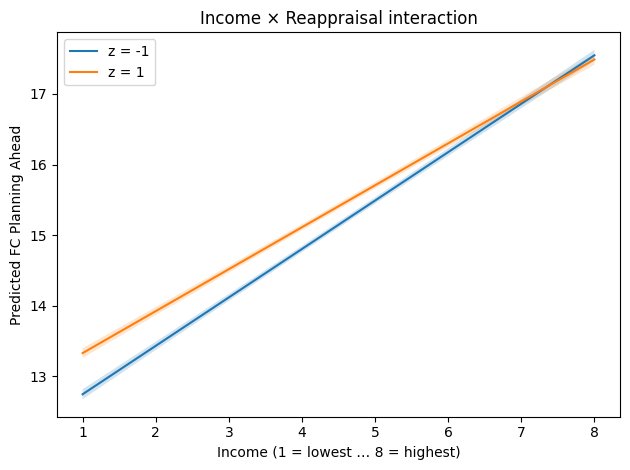

In [92]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# -------------------------------------------------
# 1  Compact prediction grid (income 1-8, z = –1/ +1)
# -------------------------------------------------
grid = pd.DataFrame(
    dict(
        income            = np.repeat(np.arange(1, 9), 2),
        z_Reappraisal     = np.tile([-1, 1], 8),
        Age               = df["Age"].mean(),
        female            = df["female"].mode()[0],
        FinancialKnowledge= df["FinancialKnowledge"].mean(),
        main_wage_earner  = df["main_wage_earner"].mode()[0],
        non_white         = df["non_white"].mode()[0],
        dependents        = df["dependents"].mean(),
    )
)

# -------------------------------------------------
# 2  Predictions & CIs (one call)
# -------------------------------------------------
pred = model.get_prediction(grid).summary_frame(alpha=.05)
grid[["fit", "low", "high"]] = pred[["mean", "mean_ci_lower", "mean_ci_upper"]]

# -------------------------------------------------
# 3  Plot in a tiny loop
# -------------------------------------------------
for z in [-1, 1]:
    g = grid[grid.z_Reappraisal == z]
    plt.plot(g.income, g.fit, label=f"z = {z}")
    plt.fill_between(g.income, g.low, g.high, alpha=.2)

plt.xlabel("Income (1 = lowest … 8 = highest)")
plt.ylabel("Predicted FC Planning Ahead")
plt.title("Income × Reappraisal interaction")
plt.legend(); plt.tight_layout(); plt.show()


In [93]:
# ------------------------------------------------------------------
# 1.  Specify and run the model
# ------------------------------------------------------------------
target   = "buyingimpulsivity"          # exact column name in df

formula  = (
    f"{target} ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner + "
    "non_white + dependents"
)

# list-wise deletion of any missing values on variables in the model
vars_ = [
    target, "z_Reappraisal", "income", "Age", "female",
    "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"
]

model_bi = smf.ols(formula, data=df.dropna(subset=vars_)).fit(cov_type="HC1")
print(model_bi.summary())

                            OLS Regression Results                            
Dep. Variable:      buyingimpulsivity   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        05:01:29   Log-Likelihood:            -3.3051e+05
No. Observations:              109375   AIC:                         6.610e+05
Df Residuals:                  109366   BIC:                         6.611e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

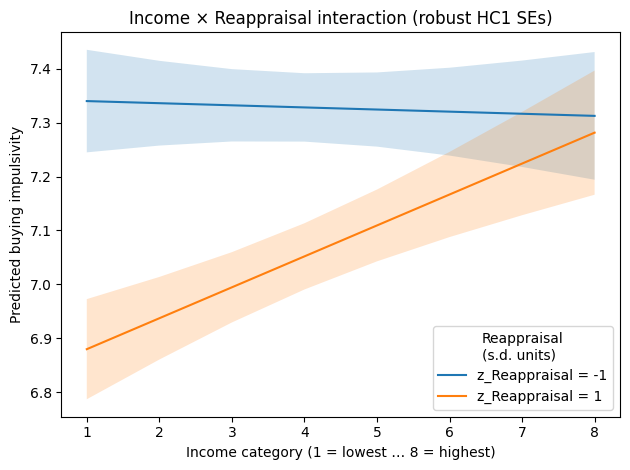

In [94]:
# ------------------------------------------------------------------
# 2.  Build prediction grid (income 1–8 × z_Reappraisal −1/+1)
# ------------------------------------------------------------------
grid = pd.DataFrame(
    dict(
        income             = np.repeat(np.arange(1, 9), 2),  # 1–8
        z_Reappraisal      = np.tile([-1, 1], 8),            # −1, +1
        Age                = df["Age"].mean(),
        female             = df["female"].mode()[0],
        FinancialKnowledge = df["FinancialKnowledge"].mean(),
        main_wage_earner   = df["main_wage_earner"].mode()[0],
        non_white          = df["non_white"].mode()[0],
        dependents         = df["dependents"].mean(),
    )
)

# ------------------------------------------------------------------
# 3.  Get predicted values + 95 % CIs
# ------------------------------------------------------------------
pred = model_bi.get_prediction(grid).summary_frame(alpha=0.05)

grid["fit"]  = pred["mean"].to_numpy()
grid["low"]  = pred["mean_ci_lower"].to_numpy()
grid["high"] = pred["mean_ci_upper"].to_numpy()

# ------------------------------------------------------------------
# 4.  Plot (mimics Stata marginsplot)
# ------------------------------------------------------------------
plt.figure()

for z in [-1, 1]:
    g = grid[grid.z_Reappraisal == z]
    plt.plot(g.income, g.fit, label=f"z_Reappraisal = {z}")
    plt.fill_between(g.income, g.low, g.high, alpha=.20)

plt.xlabel("Income category (1 = lowest … 8 = highest)")
plt.ylabel("Predicted buying impulsivity")
plt.title("Income × Reappraisal interaction (robust HC1 SEs)")
plt.legend(title="Reappraisal\n(s.d. units)")
plt.tight_layout()
plt.show()


In [95]:
print(df.columns)


Index(['ParticipantID', 'Age', 'Country', 'postdist', 'RegisteredDate', 'q1',
       'q2', 'q3', 'q4', 'q5',
       ...
       'z_Reappraisal', 'income', 'social_class', 'main_wage_earner',
       'making_ends_meet_total', 'wealth_savings', 'wealth_savings_v2',
       'non_white', 'education', 'dependents'],
      dtype='object', length=261)


In [96]:
# ------------------------------------------------------------------
# 1.  Outcome variable
# ------------------------------------------------------------------
target = "FCKeepingTrack"          # exact column name; adjust if needed

# ------------------------------------------------------------------
# 2.  Regression formula
# ------------------------------------------------------------------
formula = (
    f"{target} ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner "
    "+ non_white + dependents"
)

# ------------------------------------------------------------------
# 3.  List-wise deletion on variables in the model
# ------------------------------------------------------------------
vars_in_model = [
    target, "z_Reappraisal", "income", "Age", "female",
    "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"
]

model_track = smf.ols(
    formula,
    data=df.dropna(subset=vars_in_model)   # or use missing="drop"
).fit(cov_type="HC1")

print(model_track.summary())

                            OLS Regression Results                            
Dep. Variable:         FCKeepingTrack   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                 2.931e+05
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        05:01:31   Log-Likelihood:            -2.7613e+05
No. Observations:              109390   AIC:                         5.523e+05
Df Residuals:                  109381   BIC:                         5.524e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

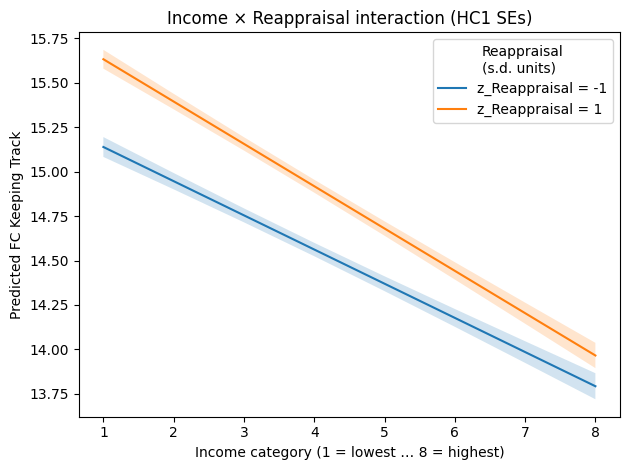

In [97]:
# ------------------------------------------------------------------
# 2.  Construct prediction grid (income 1–8 × z_Reappraisal −1/+1)
# ------------------------------------------------------------------
grid = pd.DataFrame(
    dict(
        income             = np.repeat(np.arange(1, 9), 2),   # 1 … 8
        z_Reappraisal      = np.tile([-1, 1], 8),             # −1, +1
        Age                = df["Age"].mean(),
        female             = df["female"].mode()[0],
        FinancialKnowledge = df["FinancialKnowledge"].mean(),
        main_wage_earner   = df["main_wage_earner"].mode()[0],
        non_white          = df["non_white"].mode()[0],
        dependents         = df["dependents"].mean(),
    )
)

# ------------------------------------------------------------------
# 3.  Get predictions & 95 % CIs
# ------------------------------------------------------------------
pred = model_track.get_prediction(grid).summary_frame(alpha=0.05)

grid["fit"]  = pred["mean"].to_numpy()
grid["low"]  = pred["mean_ci_lower"].to_numpy()
grid["high"] = pred["mean_ci_upper"].to_numpy()

# ------------------------------------------------------------------
# 4.  Plot (analogue to Stata marginsplot)
# ------------------------------------------------------------------
plt.figure()

for z in [-1, 1]:
    g = grid[grid.z_Reappraisal == z]
    plt.plot(g.income, g.fit, label=f"z_Reappraisal = {z}")
    plt.fill_between(g.income, g.low, g.high, alpha=.20)

plt.xlabel("Income category (1 = lowest … 8 = highest)")
plt.ylabel("Predicted FC Keeping Track")
plt.title("Income × Reappraisal interaction (HC1 SEs)")
plt.legend(title="Reappraisal\n(s.d. units)")
plt.tight_layout()
plt.show()

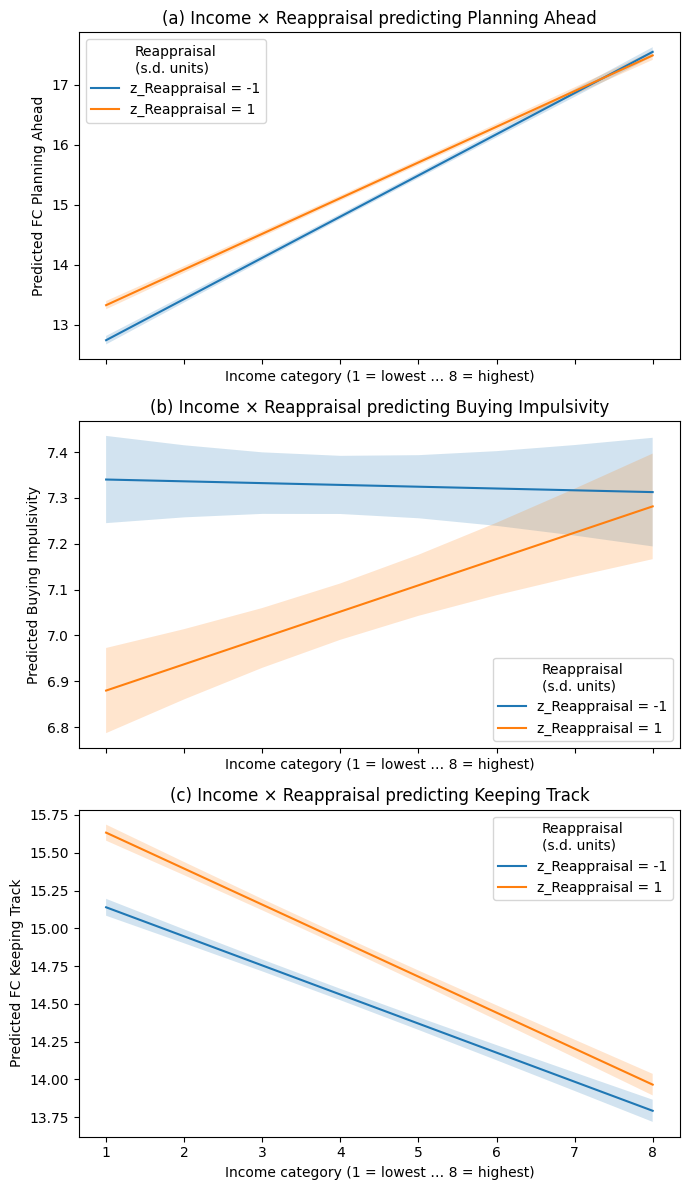

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ---------------------------------------------------------
# Helper: one regression + margins-style curve per outcome
# ---------------------------------------------------------
def plot_income_reapp(ax, df, outcome, y_label, title):
    """Fit model with <outcome>, predict over grid, draw line + 95 % CI."""
    formula = (
        f"{outcome} ~ z_Reappraisal + income + z_Reappraisal:income "
        "+ Age + female + FinancialKnowledge + main_wage_earner "
        "+ non_white + dependents"
    )
    vars_needed = [
        outcome, "z_Reappraisal", "income", "Age", "female",
        "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"
    ]
    model = smf.ols(formula, data=df.dropna(subset=vars_needed)
                    ).fit(cov_type="HC1")

    # prediction grid: income 1–8 × z_Reappraisal −1/+1
    grid = pd.DataFrame(
        dict(
            income             = np.repeat(np.arange(1, 9), 2),
            z_Reappraisal      = np.tile([-1, 1], 8),
            Age                = df["Age"].mean(),
            female             = df["female"].mode()[0],
            FinancialKnowledge = df["FinancialKnowledge"].mean(),
            main_wage_earner   = df["main_wage_earner"].mode()[0],
            non_white          = df["non_white"].mode()[0],
            dependents         = df["dependents"].mean(),
        )
    )
    pred = model.get_prediction(grid).summary_frame(alpha=0.05)
    grid["fit"]  = pred["mean"].to_numpy()
    grid["low"]  = pred["mean_ci_lower"].to_numpy()
    grid["high"] = pred["mean_ci_upper"].to_numpy()

    # plot: two lines (−1 SD, +1 SD) with shaded 95 % CIs
    for z in [-1, 1]:
        g = grid[grid.z_Reappraisal == z]
        ax.plot(g.income, g.fit, label=f"z_Reappraisal = {z}")
        ax.fill_between(g.income, g.low, g.high, alpha=.20)

    ax.set_xlabel("Income category (1 = lowest … 8 = highest)")
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(title="Reappraisal\n(s.d. units)")

# ---------------------------------------------------------
#  Figure with three vertically stacked panels
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 12), sharex=True)

plot_income_reapp(
    axes[0], df,
    outcome="FCPlanningAhead",
    y_label="Predicted FC Planning Ahead",
    title="(a) Income × Reappraisal predicting Planning Ahead"
)

plot_income_reapp(
    axes[1], df,
    outcome="buyingimpulsivity",
    y_label="Predicted Buying Impulsivity",
    title="(b) Income × Reappraisal predicting Buying Impulsivity"
)

plot_income_reapp(
    axes[2], df,
    outcome="FCKeepingTrack",
    y_label="Predicted FC Keeping Track",
    title="(c) Income × Reappraisal predicting Keeping Track"
)

plt.tight_layout()
plt.show()


*H2A. Cognitive Reappraisal ability will moderate the relationship between income and financially distressed outcomes, such that those who are low income will be less likely to experience financial stress if they are high in cognitive reappraisal.


All required columns for the model are present in the DataFrame.
                            OLS Regression Results                            
Dep. Variable:        count_bad_behav   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4153.
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        05:01:37   Log-Likelihood:            -1.3746e+05
No. Observations:              109390   AIC:                         2.749e+05
Df Residuals:                  109381   BIC:                         2.750e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

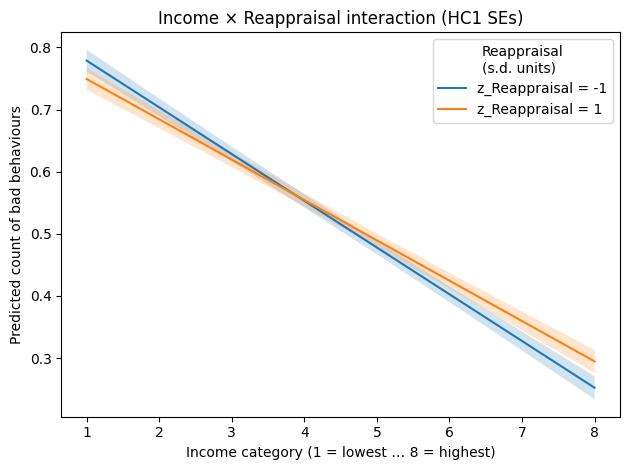

In [99]:

# ------------------------------------------------------------
# 1.  Fit the regression
# ------------------------------------------------------------
target  = "count_bad_behav"

formula = (
    f"{target} ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner "
    "+ non_white + dependents"
)

vars_needed = [
    target, "z_Reappraisal", "income", "Age", "female",
    "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"
]

# --- DIAGNOSTIC: Check if all required columns exist before dropping NaNs ---
missing_cols = [col for col in vars_needed if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the DataFrame: {missing_cols}")
    # You should stop here and fix the column creation in previous cells
    # before proceeding. For now, we will raise the error again
    # to match the original behavior, but the print statement helps diagnose.
    raise KeyError(missing_cols)
else:
    print("All required columns for the model are present in the DataFrame.")
# --- END DIAGNOSTIC ---


model_bad = smf.ols(
    formula=formula,
    data=df.dropna(subset=vars_needed)         # list-wise deletion
).fit(cov_type="HC1")

print(model_bad.summary())

# ------------------------------------------------------------
# 2.  Prediction grid (income 1–8 × z_Reappraisal −1/+1)
#    – keep all other covariates at sample mean / modal value
# ------------------------------------------------------------
grid = pd.DataFrame(
    {
        "income":             np.repeat(np.arange(1, 9), 2),
        "z_Reappraisal":      np.tile([-1, 1], 8),
        "Age":                df["Age"].mean(),
        "female":             df["female"].mode()[0],
        "FinancialKnowledge": df["FinancialKnowledge"].mean(),
        "main_wage_earner":   df["main_wage_earner"].mode()[0],
        "non_white":          df["non_white"].mode()[0],
        "dependents":         df["dependents"].mean(),
    }
)

pred_frame = model_bad.get_prediction(grid).summary_frame(alpha=0.05)

# add predictions & CIs as *new* columns (no duplicates)
grid = grid.assign(
    fit  = pred_frame["mean"].to_numpy(),
    low  = pred_frame["mean_ci_lower"].to_numpy(),
    high = pred_frame["mean_ci_upper"].to_numpy()
)

# ------------------------------------------------------------
# 3.  Plot (marginsplot analogue)
# ------------------------------------------------------------
fig, ax = plt.subplots()

for z in [-1, 1]:
    g = grid[grid["z_Reappraisal"] == z]
    ax.plot(g["income"], g["fit"], label=f"z_Reappraisal = {z}")
    ax.fill_between(g["income"], g["low"], g["high"], alpha=0.20)

ax.set_xlabel("Income category (1 = lowest … 8 = highest)")
ax.set_ylabel("Predicted count of bad behaviours")
ax.set_title("Income × Reappraisal interaction (HC1 SEs)")
ax.legend(title="Reappraisal\n(s.d. units)")

plt.tight_layout()
plt.show()

Count Regression for count_bad_behav

Since count_bad_behav is a count variable with many low values, a Poisson or Negative Binomial model may be more appropriate than OLS:

In [107]:
formula_count = (
    "count_bad_behav ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner "
    "+ non_white + dependents"
)

# Create the GLM model instance (Negative Binomial family)
nb_model = smf.glm(
    formula=formula_count,
    data=df.dropna(subset=vars_needed), # Assuming vars_needed is defined and correct
    family=sm.families.NegativeBinomial()
)

# Fit the model to the data
nb_results = nb_model.fit()

# Print the summary of the fitted model
print(nb_results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:        count_bad_behav   No. Observations:               109390
Model:                            GLM   Df Residuals:                   109381
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99755.
Date:                Sat, 17 May 2025   Deviance:                       87481.
Time:                        05:59:33   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.06956
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [100]:
# ------------------------------------------------------------
# 1.  Specify and fit the model
# ------------------------------------------------------------
target = "making_ends_meet_total"

formula = (
    f"{target} ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner "
    "+ non_white + dependents"
)

vars_needed = [
    target, "z_Reappraisal", "income", "Age", "female",
    "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"
]

model_mem = smf.ols(
    formula=formula,
    data=df.dropna(subset=vars_needed)      # list-wise deletion
).fit(cov_type="HC1")

print(model_mem.summary())

                              OLS Regression Results                              
Dep. Variable:     making_ends_meet_total   R-squared:                       0.142
Model:                                OLS   Adj. R-squared:                  0.142
Method:                     Least Squares   F-statistic:                 5.841e+04
Date:                    Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                            05:01:38   Log-Likelihood:            -2.6288e+05
No. Observations:                  109390   AIC:                         5.258e+05
Df Residuals:                      109381   BIC:                         5.259e+05
Df Model:                               8                                         
Covariance Type:                      HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

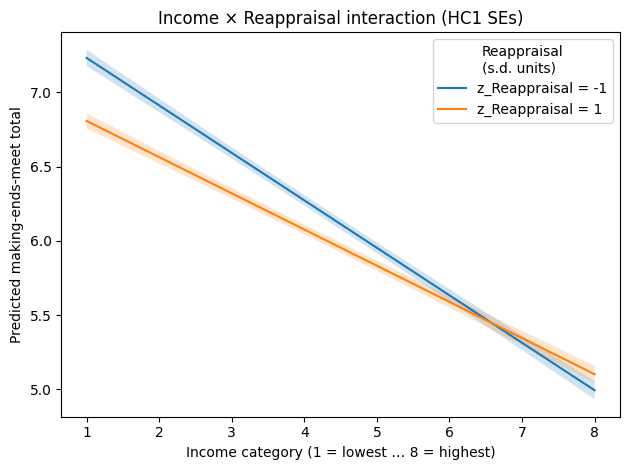

In [101]:
# ------------------------------------------------------------------
# 2. Prediction grid  (income 1‒8 × z_Reappraisal −1/+1)
# ------------------------------------------------------------------
grid = pd.DataFrame(
    {
        "income":             np.repeat(np.arange(1, 9), 2),
        "z_Reappraisal":      np.tile([-1, 1], 8),
        "Age":                df["Age"].mean(),
        "female":             df["female"].mode()[0],
        "FinancialKnowledge": df["FinancialKnowledge"].mean(),
        "main_wage_earner":   df["main_wage_earner"].mode()[0],
        "non_white":          df["non_white"].mode()[0],
        "dependents":         df["dependents"].mean(),
    }
)

pred = model_mem.get_prediction(grid).summary_frame(alpha=0.05)

grid = grid.assign(
    fit  = pred["mean"].to_numpy(),
    low  = pred["mean_ci_lower"].to_numpy(),
    high = pred["mean_ci_upper"].to_numpy()
)

# ------------------------------------------------------------------
# 3. Plot (marginsplot analogue)
# ------------------------------------------------------------------
fig, ax = plt.subplots()

for z in [-1, 1]:
    g = grid[grid["z_Reappraisal"] == z]
    ax.plot(g["income"], g["fit"], label=f"z_Reappraisal = {z}")
    ax.fill_between(g["income"], g["low"], g["high"], alpha=0.20)

ax.set_xlabel("Income category (1 = lowest … 8 = highest)")
ax.set_ylabel("Predicted making-ends-meet total")
ax.set_title("Income × Reappraisal interaction (HC1 SEs)")
ax.legend(title="Reappraisal\n(s.d. units)")
fig.tight_layout()
plt.show()

I think the DV above is coded incorrectly, need to fix.

# Random Stuff

In [102]:
# Example: Formal Interaction Test (Conditional Effects)
# Assuming you have already fitted model_bi or model_track or model_bad
# model = model_bi # Or model_track, model_bad, etc.

# Get the parameters from the fitted model
params = model.params
# Define the variance-covariance matrix (using robust standard errors)
vcov = model.cov_params_default

# Define values for z_Reappraisal where you want to test the income slope
reappraisal_values = [-1, 0, 1] # -1 SD, Mean, +1 SD

print("\n--- Testing the slope of Income at different levels of Reappraisal ---")
for z_val in reappraisal_values:
    # The slope of income is beta_income + beta_income:reappraisal * z_Reappraisal
    # Construct the hypothesis matrix [0, ..., 1 (for income), ..., z_val (for interaction), ...]
    # Find the indices of the income and z_Reappraisal:income terms in the model params
    try:
        income_idx = params.index.get_loc('income')
        interaction_idx = params.index.get_loc('z_Reappraisal:income')

        # Create a contrast vector for the linear hypothesis
        # It should have the same length as the number of parameters
        contrast = np.zeros(len(params))
        contrast[income_idx] = 1.0
        contrast[interaction_idx] = z_val

        # Perform the t-test (for a single coefficient/linear combination)
        # The hypothesis H0: income_slope = 0
        t_test_result = model.t_test(contrast)

        print(f"\nSlope of Income when z_Reappraisal = {z_val:.2f}:")
        print(t_test_result) # Provides test statistic, p-value, confidence interval

    except KeyError as e:
        print(f"Could not find parameter index for {e}. Model terms might differ.")
    except ValueError as e:
        print(f"Error constructing contrast matrix: {e}")


# Example: Adding Squared terms for Non-linearity test
# Fit a new model including squared terms for Income and z_Reappraisal
# Use the same outcome variable as before, e.g., target = "buyingimpulsivity"

formula_nonlinear = (
    f"{target} ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ I(z_Reappraisal**2) + I(income**2) " # Add squared terms
    "+ Age + female + FinancialKnowledge + main_wage_earner "
    "+ non_white + dependents"
)

# Make sure the variables for the new formula are in vars_needed if using dropna(subset=...)
# (In this case, income and z_Reappraisal are already there, no new vars added)
# vars_needed_nonlinear = vars_needed # No change needed for vars_needed in this case

model_nonlinear = smf.ols(
    formula=formula_nonlinear,
    data=df.dropna(subset=vars_needed) # Use the same dropna subset as original model
).fit(cov_type="HC1")

print("\n--- Model with Non-linear Terms ---")
print(model_nonlinear.summary())

# Check the p-values for I(z_Reappraisal**2) and I(income**2) to see if the non-linear terms are significant.


# Example: Testing FinancialWellbeing as an outcome (H2B)
target_fwb = "FinancialWellbeing"

formula_fwb = (
    f"{target_fwb} ~ z_Reappraisal + income + z_Reappraisal:income "
    "+ Age + female + FinancialKnowledge + main_wage_earner "
    "+ non_white + dependents"
)

vars_needed_fwb = [
    target_fwb, "z_Reappraisal", "income", "Age", "female",
    "FinancialKnowledge", "main_wage_earner", "non_white", "dependents"
]

# Ensure FinancialWellbeing is created and added to df before this cell
# (You have code for this earlier in the notebook)

# Check if FWB target column exists before dropping NaNs
if target_fwb not in df.columns:
    print(f"Error: The target column '{target_fwb}' is missing from the DataFrame.")
    # Add code here to stop execution or raise error if desired
else:
    model_fwb = smf.ols(
        formula=formula_fwb,
        data=df.dropna(subset=vars_needed_fwb)
    ).fit(cov_type="HC1")

    print(f"\n--- Model Predicting {target_fwb} ---")
    print(model_fwb.summary())

    # You could then generate predictions and plot for model_fwb similar to your existing plots.


# Example: Subgroup Analysis (e.g., by gender)
# Assuming 'female' column exists (coded 0/1)

# Model for Females (female == 1)
df_female = df[df['female'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning

model_female = smf.ols(
    formula=formula, # Use the original formula, but on the subset
    data=df_female.dropna(subset=vars_needed)
).fit(cov_type="HC1")

print("\n--- Model for Females ---")
print(model_female.summary())

# Model for Males (female == 0)
df_male = df[df['female'] == 0].copy()

model_male = smf.ols(
    formula=formula,
    data=df_male.dropna(subset=vars_needed)
).fit(cov_type="HC1")

print("\n--- Model for Males ---")
print(model_male.summary())

# Compare the interaction terms (and other coefficients) between the two models.
# Or, include a three-way interaction in the main model:
# formula_3way = (
#     f"{target} ~ z_Reappraisal * income * female " # Add the 3-way interaction
#     "+ Age + FinancialKnowledge + main_wage_earner "
#     "+ non_white + dependents"
# )
# model_3way = smf.ols(formula=formula_3way, data=df.dropna(subset=vars_needed + ['female'])).fit(cov_type="HC1")
# print("\n--- Model with 3-Way Interaction (Income*Reappraisal*Female) ---")
# print(model_3way.summary())
# The coefficient for the 3-way interaction term (e.g., 'z_Reappraisal:income:female') tests if the Income*Reappraisal interaction differs between females and males.


# Note: Mediation and Moderated Mediation are more involved and might require installing
# and using a dedicated library or implementing bootstrapping manually.
# Libraries like 'pingouin' might have some mediation functions, or look for
# dedicated mediation analysis Python packages.


--- Testing the slope of Income at different levels of Reappraisal ---

Slope of Income when z_Reappraisal = -1.00:
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6856      0.009     79.213      0.000       0.669       0.703

Slope of Income when z_Reappraisal = 0.00:
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6398      0.006    107.058      0.000       0.628       0.651

Slope of Income when z_Reappraisal = 1.00:
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '



--- Model for Males ---
                              OLS Regression Results                              
Dep. Variable:     making_ends_meet_total   R-squared:                       0.124
Model:                                OLS   Adj. R-squared:                  0.123
Method:                     Least Squares   F-statistic:                 3.027e+04
Date:                    Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                            05:01:40   Log-Likelihood:            -1.2023e+05
No. Observations:                   51129   AIC:                         2.405e+05
Df Residuals:                       51121   BIC:                         2.406e+05
Df Model:                               7                                         
Covariance Type:                      HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '
